In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Загрузите файл HR.csv в pandas dataframe

In [4]:
df = pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### task 1 completed

#### Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Данные хорошие, пустых значений нет, уже радует. 

### task 2 completed

#### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
#### Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [8]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


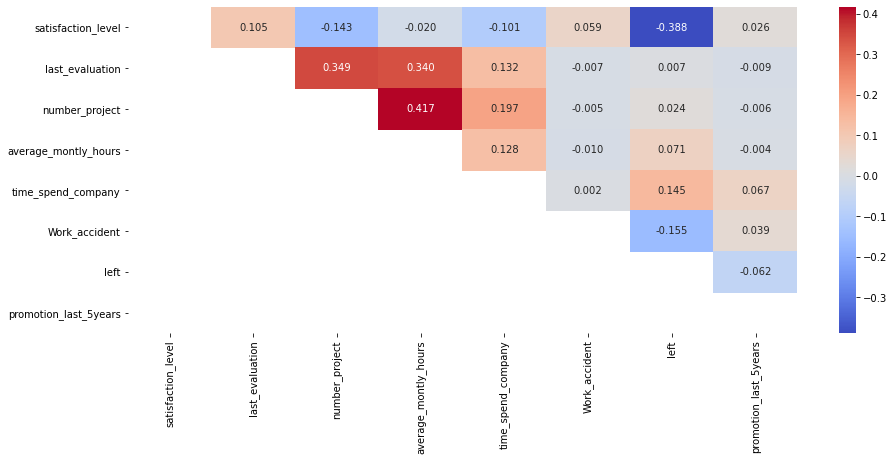

In [9]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', mask=mask, cmap= 'coolwarm')

Из графика видно, что наиболее коррелирующие пары: 
* "average_monthly_hours" и "number_projects" со значением 0,417
* "left" и "satisfaction_level" со значением -0,388

В целом связь средняя, не говорит о прямой зависимости. 
Интерпретировать можно так: 
1. Много работаешь - много выполняешь проектов. Очень логично. 
2. Чем меньше довольных работой - тем больше уволенных. Тоже вывод сам по себе напрашивается :) 

Наименее коррелирующая пара: 
* work_accident и time_spend_company

Хотя странно. Чем дольше работаешь, тем больше времени для несчастного случая :) 


### task 3 completed

#### Рассчитайте сколько сотрудников работает в каждом департаменте.

In [10]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### task 4 completed

#### Показать распределение сотрудников по зарплатам.

In [11]:
rcParams['figure.figsize'] = 3,6

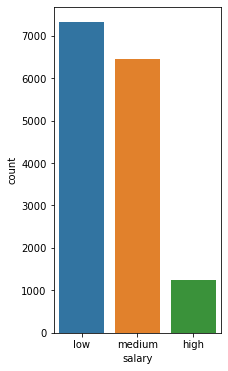

In [12]:
sns.countplot(x='salary', data=df);

### task 5 completed

#### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [13]:
df_pivot_1 = df.pivot_table(
    index = 'department', 
    columns = 'salary', 
    values = 'Work_accident', 
    aggfunc='count')
df_pivot_2 = df_pivot_1[['low', 'medium', 'high']]
df_pivot_2

salary,low,medium,high
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


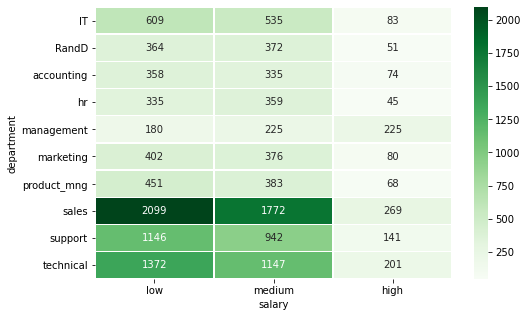

In [16]:
rcParams['figure.figsize'] = 8,5
sns.heatmap(data=df_pivot_2,
            annot=True,
            fmt="d",
            cmap="Greens",
            linewidths=.5)

### task 6 completed

#### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

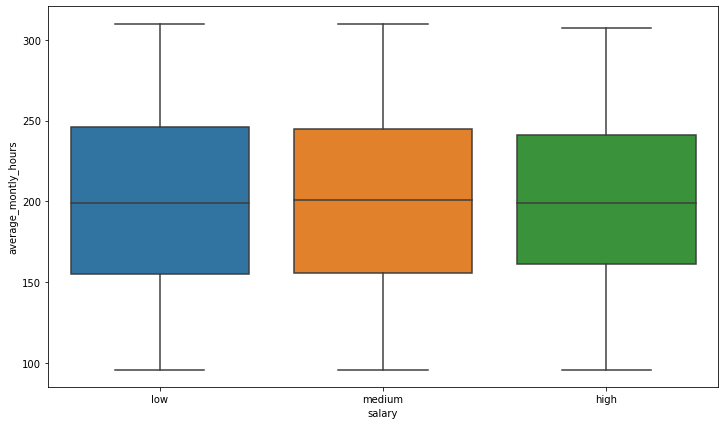

In [20]:
rcParams['figure.figsize'] = 12,7
sns.boxplot(x="salary", y="average_montly_hours", data = df)

Вывод: Нет. Гипотеза не подтвердилась. В среднем все они на работе проводят одинаковое кол-во часов. 

### task 7 completed

#### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

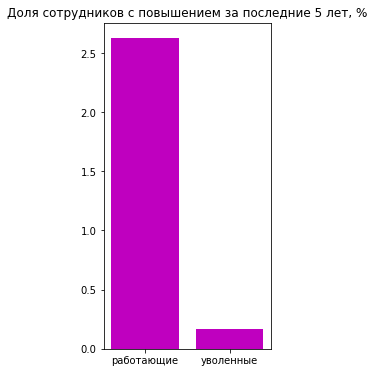

Доля сотрудников с повышением за последние 5 лет среди работающих: 2.63%
Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.17%


In [21]:
df_2 = df.groupby('left').promotion_last_5years.value_counts()
rcParams['figure.figsize'] = 3,6
x1 = ['работающие', 'уволенные']
y1 = [df_2[0][1] / df_2[0].sum()*100, df_2[1][1] / df_2[0].sum()*100]

plt.bar(x1, y1, color='m')
plt.title('Доля сотрудников с повышением за последние 5 лет, %')
plt.show()
print(f'Доля сотрудников с повышением за последние 5 лет среди работающих: {(df_2[0][1] / df_2[0].sum())*100:.2f}%')
print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся: {(df_2[1][1] / df_2[0].sum())*100:.2f}%')

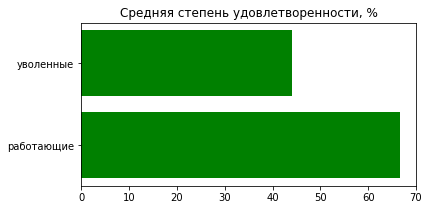

Средняя степень удовлетворенности среди работающих: 66.68%
Средняя степень удовлетворенности среди уволившихся: 44.01%


In [22]:
df_3 = df.groupby('left').satisfaction_level.mean()
rcParams['figure.figsize'] = 6,3
x2 = ['работающие', 'уволенные']
y2 = [df_3[0]*100, df_3[1]*100]

plt.barh(x2, y2, color='g')
plt.title('Средняя степень удовлетворенности, %')
plt.show()
print(f'Средняя степень удовлетворенности среди работающих: {(df_3[0])*100:.2f}%')
print(f'Средняя степень удовлетворенности среди уволившихся: {(df_3[1])*100:.2f}%')

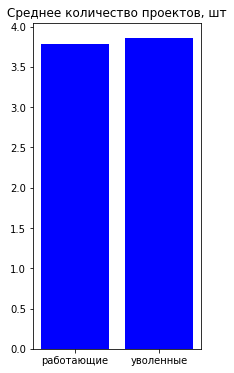

Среднее количество проектов среди работающих: 3.79
Среднее количество проектов среди уволившихся: 3.86


In [23]:
df_4 = df.groupby('left').number_project.mean()
rcParams['figure.figsize'] = 3,6

x2 = ['работающие', 'уволенные']
y2 = [df_4[0], df_4[1]]
plt.bar(x2, y2, color='b')
plt.title('Среднее количество проектов, шт')
plt.show()

print(f'Среднее количество проектов среди работающих: {(df_4[0]):.2f}')
print(f'Среднее количество проектов среди уволившихся: {(df_4[1]):.2f}')

### task 8 completed

#### Разделить данные на тестовую и обучающую выборки.
#### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
#### Оценить качество модели на тестовой выборки.

Убрал факторы: "promotion_last_5years" и "work_accident" так как они не непрерывные, а категориальные. 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    ]], df['left'].values, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
result = pd.DataFrame([y_test, y_pred]).T
print(result.head(10))
print(f'\nКоэффициент точности: {accuracy_score(y_test, y_pred):.2f}')

   0  1
0  0  0
1  1  1
2  0  0
3  0  0
4  0  0
5  0  0
6  0  0
7  0  0
8  0  0
9  0  0

Коэффициент точности: 0.76


### task 9 completed

#### Загрузить jupyter notebook с решение на github и прислать ссылку

### task 10 completed